# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports and model class](#toc1_)
- 2. [Question 1: Illustrate in Edgeworth box](#toc2_)    
- 3. [Question 2: Calculate the error in the market clearing condition s](#toc3_)
- 4. [Question 3: What is the market clearing price?](#toc4_)
- 5. [Question 4a: Find the allocation if only prices in P1 can be chosen](#toc5_)
- 6. [Question 4b: Find the allocation if any positive price can be chosen](#toc6_)
- 7. [Question 5a: Find the allocation if the choice set is restricted to C](#toc7_)
- 8. [Question 5b: Find the allocation if no further restrictions are imposed](#toc8_)
- 9. [Question 6a: Find the resulting allocation](#toc9_)
- 10. [Question 6b: Illustrate and compare our results in question 3-5, and discuss pros and cons of the various allocations](#toc10_)
- 11. [Question 7: Draw a set W with 50 elements](#toc11_)
- 12. [Question 8: Find the market equilibrium allocation for each w^A belonging to C and plot them in the Edgeworth box](#toc12_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc1_)

In [174]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
#Model class recieved from Jeppe Druedahl
from ExchangeEconomy import ExchangeEconomyClass

Imports and set magics:

In [176]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this project, we utilize the setup and provided information from the 'InauguralProject2024.ipynb" file to address questions 1 through 8. We are not duplicating every given function or text, as they are available in the "InauguralProject2024.ipynb" file located under lectures.

## 2. <a id='toc2_'></a>[Question 1: Illustrate in Edgeworth box](#toc2_)

In the first question we are asked to find the pairs of combinations of $x_1^A$ and $x_2^A$ that leaves both consumer A and B as least as well of as with their initial endowments i.e. the Pareto improvements relative to the endowments. The Pareto improvements we find, we shall present in an Edgeworth box.

When finding the allocations for good 1 and 2, we need to include the restrictions C given in the assignment text.

Pareto improvement: (xA1 = 0.08 , xA2 = 0.9600000000000001 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.88 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.8933333333333334 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9066666666666667 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.92 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9333333333333333 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9466666666666668 )
Pareto improvement: (xA1 = 0.09333333333333334 , xA2 = 0.9600000000000001 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8266666666666668 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8400000000000001 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8533333333333334 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.8666666666666667 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.88 )
Pareto improvement: (xA1 = 0.10666666666666667 , xA2 = 0.893333333333

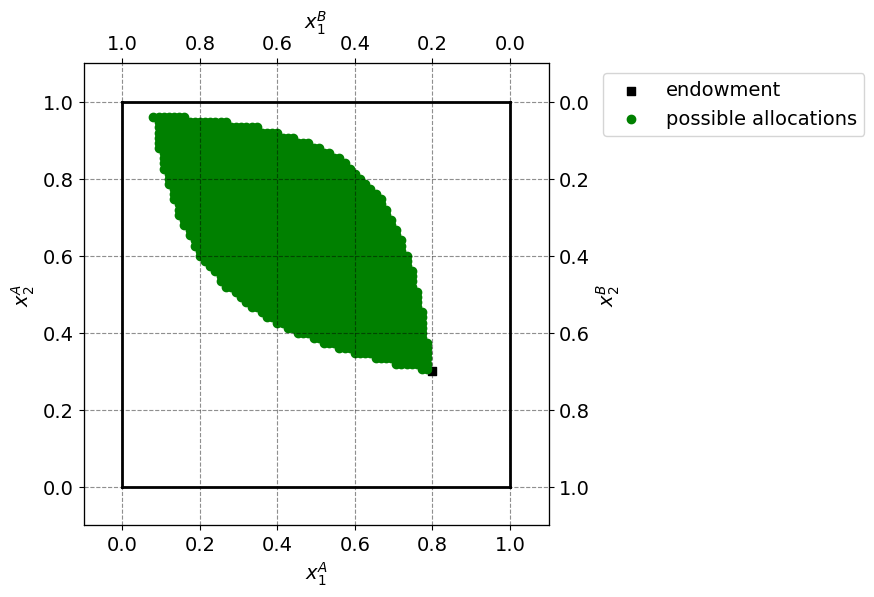

In [193]:
#First we link our notebook (ipynb) to our python file (py) where we have predefined the given utility functions, demand functions and different parameters. Thereby we can extract them from the py file to use in the ipynb file.
model = ExchangeEconomyClass()
#With the following we make it possible to use parameters from our py file by just writing "par" before a parameter.
par = model.par

# We define the total endowment for both goods: 
w1bar = 1.0
w2bar = 1.0

#We set up the C-restrictions given: 
N = 75
x_grid = np.arange(0, 1, 1/N)

#We create an empty list for each good to store coordinates of Pareto improvements for goods 1 and 2. These lists will store the x-coordinates and y-coordinates respectively of Pareto improvements found during the loop.
p_imp_good1 = [] 
p_imp_good2 = [] 

#We find the utility with the given endowments:
u_A_in = model.utility_A(par.w1A, par.w2A)
u_B_in = model.utility_B(1-par.w1A, 1-par.w2A)

#We use a for loop to iterate over the x_grid to find allocations that results in Pareto improvements over the initial endowments.
#This gives us all the actually combinations of x1A and x2A that are pareto improvements from the initial endowments
for x1A in x_grid:
    for x2A in x_grid: 
        utility_A_q1 = model.utility_A(x1A, x2A)
        utility_B_q1 = model.utility_B(1-x1A, 1-x2A)
        if utility_A_q1 >= u_A_in and utility_B_q1 >= u_B_in:
            p_imp_good1.append(x1A)
            p_imp_good2.append(x2A)
            print("Pareto improvement: (xA1 =", x1A, ", xA2 =", x2A, ")")


# We set up the figure for the Edgeworth box:
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

#Wre plot the initial endowment and Pareto improvement lists:
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(p_imp_good1,p_imp_good2,marker='o',color='green',label='possible allocations')

# We define limits for the figure: 
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.7,1.0));



In the Edgeworth box above we see all the Pareto improvements (Green circles) relative to the initial endowment (black square).
Further more we have provide a list of all the pareto improvements allocation of good 1 and 2 for consumer A.
For example with the first combination where x1A = 0,08 (A's amount of good 1) and x2A = 0,96 (A's amount of good 2) we have a pareto improvement relative to the initial endowment.
It means that for all these pareto improvements both consumers are at least as well off as they were with their initial endowment

## 3. <a id='toc3_'></a>[Question 2: Calculate the error in the market clearing condition s](#toc3_)

In the second question we are asked to calculate the error in the market clearing condition s for $ p1 \in P1 $.

p1 = 0.5, error1 = 0.533333333333333, error2 = -0.2666666666666666
p1 = 0.5266666666666666, error1 = 0.47594936708860747, error2 = -0.25066666666666654
p1 = 0.5533333333333333, error1 = 0.42409638554216866, error2 = -0.23466666666666652
p1 = 0.58, error1 = 0.3770114942528735, error2 = -0.2186666666666665
p1 = 0.6066666666666667, error1 = 0.334065934065934, error2 = -0.2026666666666665
p1 = 0.6333333333333333, error1 = 0.29473684210526296, error2 = -0.18666666666666654
p1 = 0.66, error1 = 0.2585858585858585, error2 = -0.1706666666666664
p1 = 0.6866666666666666, error1 = 0.22524271844660176, error2 = -0.1546666666666665
p1 = 0.7133333333333334, error1 = 0.19439252336448576, error2 = -0.1386666666666665
p1 = 0.74, error1 = 0.16576576576576557, error2 = -0.12266666666666659
p1 = 0.7666666666666666, error1 = 0.13913043478260867, error2 = -0.10666666666666658
p1 = 0.7933333333333333, error1 = 0.11428571428571416, error2 = -0.09066666666666645
p1 = 0.8200000000000001, error1 = 0.0910569105691

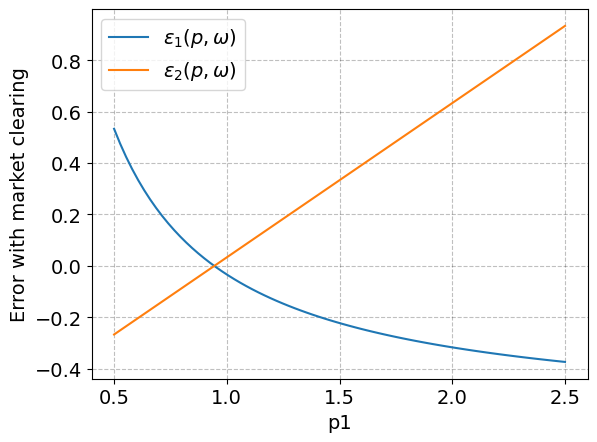

In [218]:
model = ExchangeEconomyClass()

# We create a list of p1 values using list comprehension
p1 = [0.5+2*t/N for t in range(N+1)]

#We do another list comprehension called epsilon. 
#It contains the excess demand calculated for each p1 value using the check_market_clearing method provided by the model ExchangeEconomyClass().
#The resulting excess demand values are stored in the list epsilon.
epsilon = [model.check_market_clearing(t) for t in p1]

# Extracting error term 1 and error term 2 from the epsilon:
error1 = [error[0] for error in epsilon]
error2 = [error[1] for error in epsilon]

#We create a loop where we iterate over each value of p1 and for each p1 value in the given interval we print its corresponding values of error1 and error2.
for i in range(len(p1)):
    print(f"p1 = {p1[i]}, error1 = {error1[i]}, error2 = {error2[i]}")

#We plot error1 and error2
plt.plot(p1, error1, label='$\epsilon_1(p,\omega)$')
plt.plot(p1, error2, label='$\epsilon_2(p,\omega)$')

#Figure setup:
plt.xlabel('p1')
plt.ylabel('Error with market clearing')
plt.legend()

# Showing the plot
plt.show()


Above we have printet for every value of p1 in the given interval its respective value of the error 1 and error 2 term and further illustrated it in the plot above. 
The intersection between $\epsilon_1(p,\omega)$ and $\epsilon_2(p,\omega)$ is where we are closest to market clearing (closest to zero). 
Market clearing is when supply equals demand. If we have excess supply the error with market clearing would be negative and for excess demand the error for market clearing is positive. 

## 4. <a id='toc4_'></a>[Question 3: What is the market clearing price?](#toc4_)

In the third question we are asked to find the market clearing price.

In [219]:
#We initialize variables to track minimum absolute errors and corresponding p1 values:
min_abs_error1 = float('inf')
min_abs_error2 = float('inf')
p1_min_abs_error1 = None
p1_min_abs_error2 = None

#We iterate over each value of p1
for i in p1:
    # Calculating errors for the current value of p1
    error1, error2 = model.check_market_clearing(i)
    
    # Updating minimum absolute errors and corresponding p1 values if smaller absolute errors are found:
    if abs(error1) < min_abs_error1:
        min_abs_error1 = abs(error1)
        p1_min_abs_error1 = i #It means that for the p1 value where error1 is less than the min_abs_error1 is called p1_min_abs_error1
    if abs(error2) < min_abs_error2:
        min_abs_error2 = abs(error2)
        p1_min_abs_error2 = i

#We print the p1 values where error1 and error2 are minimized as much as possible
print("p1 value for minimum error1:", p1_min_abs_error1, p1_min_abs_error2)

#Now we find the allocations and utility for consumer A and B given p1 = 0.95 as we found above. 
#First we find the allocations: 
#Consumer A's allocations: 
x1A_optimal_q3, x2A_optimal_q3 = model.demand_A(p1_min_abs_error1, 1)[0], model.demand_A(p1_min_abs_error2, 1)[1]
print("Optimal allocations given p1 for consumer A:", "x1A =", x1A_optimal_q3, "x2A =", x2A_optimal_q3)

#Consumer B's allocations: 
x1B_optimal_q3, x2B_optimal_q3 = 1-x1A_optimal_q3, 1-x2A_optimal_q3
print("Optimal allocations given p1 for consumer B:", "x1B =", x1B_optimal_q3, "x2B =", x2B_optimal_q3)

#Consumer A's utility: 
utility_A_q3 = model.utility_A(x1A_optimal_q3, x2A_optimal_q3)
print("Utility for consumer A given p1 and optimal allocations:", utility_A_q3)

#Consumer B's utility: 
utility_B_q3 = model.utility_B(x1B_optimal_q3, x2B_optimal_q3)
print("Utility for consumer B given p1 and optimal allocations:", utility_B_q3)



p1 value for minimum error1: 0.9533333333333334 0.9533333333333334
Optimal allocations given p1 for consumer A: x1A = 0.3715617715617715 x2A = 0.7084444444444445
Optimal allocations given p1 for consumer B: x1B = 0.6284382284382285 x2B = 0.29155555555555546
Utility for consumer A given p1 and optimal allocations: 0.5713219032023724
Utility for consumer B given p1 and optimal allocations: 0.48649924528245264


We have found the market clearing price to be p1 = 0.9533. This is where we have the intersection between $\epsilon_1(p,\omega)$ and $\epsilon_2(p,\omega)$. 

The other results are meant for later use to compare in question 6b.

## 5. <a id='toc5_'></a>[Question 4a: Find the allocation if only prices in P1 can be chosen](#toc5_)


In this exercise we want to find the allocation if only prices in $P_1$ can be chosen, which is given in the assignmnent as $P_1$ in an interval between 0.5 and 2.5, where N = 75. We want to maximize the utility of consumer A to maximize his/hers utility, while considering consumption choices for consumer B.

In [227]:
#Here we import the minimize functionality from the scipy.optimize
from scipy.optimize import minimize

model = ExchangeEconomyClass()

#We create the specified range for p1 given by the assignment and setting p2 as numeriare.
p1 = [0.5+2*t/N for t in range(N+1)]
p2 = 1

#We define the utility-function given the new prices, which we have derived above
def utility_A(x1B, x2B, p1, par):
    return (1-x1B)**par.alpha*(1-x2B)**(1-par.alpha)

#We define a function which purpose is to maximize consumer A's utility given the demand for goods by consumer B and p1.
def max_utility_A_given_B(p1, par):
    # Calculating demand for goods by consumer B given p1:
    x1B, x2B = model.demand_B(p1, p2)
    
    # Calculating utility of consumer A given demand of B and prices p1
    utility_A_q4a = utility_A(x1B, x2B, p1, par)
    
    # We use negative utility because we are maximizing from scipy
    return -utility_A_q4a

# Initial guess for p1 is the one we found in question 3: 0.9533
p1_initial_guess = 0.9533

# We optimize the utility of consumer A: 
result = minimize(max_utility_A_given_B, p1_initial_guess, args=(model3.par,))

# Extract the optimal p1 from the result given above
optimal_p1 = result.x[0]

# Calculating the demand for goods by consumer B with the optimal p1
x1B_optimal_q4a, x2B_optimal_q4a = model.demand_B(optimal_p1, p2)

# Calculating the utility of consumer A with the optimal p1 and optimal demand of B
utility_A_optimal_q4a = utility_A(x1B_optimal_q4a, x2B_optimal_q4a, optimal_p1, model.par)

# Here we calculate the optimal amount of the two goods for consumer A
x1A_optimal_q4a = 1 - x1B_optimal_q4a
x2A_optimal_q4a = 1 - x2B_optimal_q4a

#Consumer B's utility:
utility_B_optimal_q4a = model.utility_B(x1B_optimal_q4a, x2B_optimal_q4a)

# We print out the optimal price, utility for both consumers plus both consumers optimal allocations
print("Optimal p1:", optimal_p1)
print("Consumer B's allocations:", "x1B =", x1B_optimal_q4a, "x2B =", x2B_optimal_q4a)
print("Utility for consumer A given B's x1B and x2B as well p1:", utility_A_optimal_q4a)
print("Consumer A's allocations:", "x1A =", x1A_optimal_q4a, "x2A =", x2A_optimal_q4a)
print("Utility for consumer B:", utility_B_optimal_q4a)

Optimal p1: 1.8992443517490574
Consumer B's allocations: x1B = 0.379045090347065 x2B = 0.3599496234499372
Utility for consumer A given B's x1B and x2B as well p1: 0.6336208503815268
Consumer A's allocations: x1A = 0.620954909652935 x2A = 0.6400503765500628
Utility for consumer B: 0.3725699512813305


From the results above we can tell that the allocation that maximizes A's utility is for consumer A approximately 0.6210 units of good 1 and 0.6401 units of good 2, which gives consumer A the utility of approx. 0.6336 given consumption choices for consumer B. This leaves consumer B with the allocation of the two goods of 0.3790 units of good 1 and 0.3599 units of good 2.

The extra information given in as results will be used for later in the assignment in question 6b, where we want to compare between results from question 3-5.

## 6. <a id='toc6_'></a>[Question 4b: Find the allocation if any positive price can be chosen](#toc6_)

In this question we are asked to find the allocation that maximizes consumer A's utility given the consumption choices for consumer B like in the previous question, but this time the price can be any positive number and not restricted to prices in $P1$.

In [228]:
# We import the minimize_scalar from scipy.optimzie
from scipy.optimize import minimize_scalar

#We are defining the utility function for consumer A, given price p1 and consumer B's endownments.
def utility_A_at_given_prices(p1, w1B, w2B):
    x1B = 1 - model.demand_B(p1, 1)[0]  # Calculate x1B using consumer B's demand function and setting p2 as numeraire
    x2B = 1 - model.demand_B(p1, 1)[1]  # Calculate x2B using consumer B's demand function
    if x1B < 0 or x2B < 0: #We don't want situations where x1B or x2B are below zero
        return 0
    return model.utility_A(x1B, x2B)     # Calculating and returning utility of A given x1B and x2B

# Defining the utility function we want to maximize (minimize with a negative sign)
def maximize_A_utility(p1):
    return -utility_A_at_given_prices(p1, model.par.w1B, model.par.w2B) # Here we return Consumer A's utility at p1 and B's endowments

# We are creating a wide range of p1, and therefore allowing for any positive price
p1_values = [0.01 * t for t in range(1, 1001)] #A thousand because we can't get "inf" to work...

# We perform the minization again, but not using bounds this time, because we dont want an upper bound.
result = minimize_scalar(maximize_A_utility, bracket=[0.5, 2.5])

# Again extracting the result to a new variable for the optimal price
optimal_price_q4b = result.x

# Calculating the allocations replacing p1 with the optimal price found.
x1B_optimal_q4b = 1 - model.demand_B(optimal_price_q4b, 1)[0]
x2B_optimal_q4b = 1 - model.demand_B(optimal_price_q4b, 1)[1]

#Consumer A's allocations: 
x1A_optimal_q4b = 1-x1B_optimal_q4b
x2A_optimal_q4b = 1-x2B_optimal_q4b

#Calculating Consumer A's utility: 
utility_A_q4b = model.utility_A(x1B_optimal_q4b, x2B_optimal_q4b)

#Calculating Consumer B's utility: 
utility_B_q4b = model.utility_B(x1B_optimal_q4b, x2B_optimal_q4b)

# Printing the results.
print("Optimal price:", optimal_price_q4b)
print("Optimal allocation for consumer A:", "x1A =", x1A_optimal_q4b, ", x2A =", x2A_optimal_q4b)
print("Optimal allocation for consumer B:", "x1B =", x1B_optimal_q4b, ", x2B =", x2B_optimal_q4b)
print("Consumer A's utility:", utility_A_q4b)
print("Consumer B's utility:", utility_B_q4b)

Optimal price: 1.8993462971582264
Optimal allocation for consumer A: x1A = 0.379031902027671 , x2A = 0.3599564198105484
Optimal allocation for consumer B: x1B = 0.620968097972329 , x2B = 0.6400435801894516
Consumer A's utility: 0.6336208506936609
Consumer B's utility: 0.6272625722062903


We have now calculated the consumption choices of consumer A, but this time without any price constraint, meaning that $p_1 > 0$. The optimal price that maximizes consumer A's utility remains fairly consistent at approximately 1.8993 in both of these questions. The utility for consumer A is also constant between these two question, which makes sense, because we are dealing with such small ranges, that the constraint does not have an effect on consumer A's utility. Consumer B benefits from the no price constraint, getting a much higher utility of approximately 0.627 and only 0.3725 when there was a contraint.

## 7. <a id='toc7_'></a>[Question 5a: Find the allocation if the choice set is restricted to C](#toc7_)

In this question we need to find the allocation, but the choice set is restricted to C. This means to find the utility for A given the goods for A, which are in C. We have to remember that B's utility cannot be worse off than his initial endownments, when we get our results. A is thus the market maker.

In [229]:
model = ExchangeEconomyClass()
from scipy.optimize import minimize

# We create the specific range given in C
N = 75
x_grid = np.arange(0, 1, 1/N)

# This constraint tells us that the utility of consumer A minus the intitial utility should be zero or positive
# We take a vector "x" containing the allocations x1A and x2A, that we want to use to find the utility for consumer A
def constraint1(x):
    x1A, x2A = x
    return model.utility_A(x1A, x2A) - model.utility_A(par.w1A, par.w2A)

# Here we do the same for consumer B as we did for A.
def constraint2(x):
    x1A, x2A = x
    return model.utility_B(1 - x1A, 1 - x2A) - model.utility_B(par.w1B, par.w2B)

# Define the total utility of consumer B with initial endowments and printing them
uA_initial = model.utility_A(par.w1A, par.w2A)
uB_initial = model.utility_B(par.w1B, par.w2B)
print("Initial utility for A:", (uA_initial))
print("Initial utility for B:", (uB_initial))

# We set the bounds for x1A and x2A, meaning that the allocation can only be between 0 and 1.
bounds = [(0, 1), (0, 1)]

# We perform the optimization using the bounds defined and the constraints above.
result = minimize(lambda x: -model.utility_A(x[0], x[1]), x0=(0.5, 0.5), bounds=bounds, constraints=[{'type': 'ineq', 'fun': constraint1}, {'type': 'ineq', 'fun': constraint2}])

# We extract the result that we get into x1A_optimal and x2a_optimal
x1A_optimal_q5a, x2A_optimal_q5a = result.x

#We initialize the best utility for consumer A
best_uA = 0

#Here we loop through the grid, so that we can find the optimal consumption choice for consumer A
for x1A_optimal_q5a in x_grid:
    for x2A_optimal_q5a in x_grid: 
        ua_new = model.utility_A(x1A_optimal_q5a, x2A_optimal_q5a)
        ub_new = model.utility_B(1-x1A_optimal_q5a, 1-x2A_optimal_q5a)
        if ua_new >= uA_initial and ub_new >= uB_initial:
            best_uA = ua_new
            best_x1A = x1A_optimal_q5a
            best_x2A = x2A_optimal_q5a

#The best_x1A and best_x2A is the best of the optimals we have found, therefore in the furture questions when refering to the allocations found in q5a it is those to. 
# We extract the optimal price from the result, where we minimize the utility for consumer A
optimal_p1_q5a = result.x[0]

#Printing the rest of the values
print("Consumer A's utility =", best_uA)
print("Consumer B's utility =", model.utility_B(1-best_x1A, 1-best_x2A))
print("Improved allocations for consumer A:", "x1A =", best_x1A, "x2A =", best_x2A)
print("Improved allocations for consumer B:", "x1B =", 1-best_x1A, "x2B =", 1-best_x2A)
print("Price in q5a is then:", "p1 =", optimal_p1_q5a)

Initial utility for A: 0.41601676461038084
Initial utility for B: 0.3036588971875663
Consumer A's utility = 0.4786243189492143
Consumer B's utility = 0.30552823018573
Improved allocations for consumer A: x1A = 0.7866666666666667 x2A = 0.37333333333333335
Improved allocations for consumer B: x1B = 0.21333333333333326 x2B = 0.6266666666666667
Price in q5a is then: p1 = 0.6808707632770316


From our results above, we can conclude that Consumer A's utility has improved from 0.4160 to 0.4786. This indicated that the new allocation that we derived indeed is better for consumer A compared to the initial endownment. The same is the case for consumer B. This is therefore what we were looking for, when calculating this new allocation. This tells us that the market is in equilibrium, and that the price is approximately 0.6809.

## 8. <a id='toc8_'></a>[Question 5b: Find the allocation if no further restrictions are imposed](#toc8_)

In this question we again need to find the allocation, but this time there are no further restrictions imposed. We still want to maximize the utility for consumer A given his/hers choices.

In [230]:
model = ExchangeEconomyClass()
from scipy.optimize import minimize

#We need to delete the constraints we put on A and therefore we only keep the ones for B:
def constraint2(x):
    x1A, x2A = x
    return model.utility_B(1 - x1A, 1 - x2A) - model.utility_B(par.w1B, par.w2B)

# Defining the total utility of consumer B with initial endowments
uA_initial = model.utility_A(par.w1A, par.w2A)
uB_initial = model.utility_B(par.w1B, par.w2B)
print("Initial utility for A:", (uA_initial))
print("Initial utility for B:", (uB_initial))

# We set the bounds for x1A and x2A, meaning that the allocation can only be between 0 and 1.
bounds = [(0, 1), (0, 1)]

# We perform the optimization using the bounds defined and the constraints above.
result = minimize(lambda x: -model.utility_A(x[0], x[1]), x0=(0.5, 0.5), bounds=bounds, constraints=[{'type': 'ineq', 'fun': constraint2}])

# We extract the result that we get into x1A_optimal and x2a_optimal
x1A_optimal_q5b, x2A_optimal_q5b = result.x

#We print out the results.
print("x1A and x2A with no further restrictions (x1A =", x1A_optimal_q5b,", x2A =", x2A_optimal_q5b, ")")
print("x1B and x2B (x1B =", 1-x1A_optimal_q5b,", x2B =", 1-x2A_optimal_q5b, ")")
print("Consumer A's utility with no restrictions:", model.utility_A(x1A_optimal_q5b, x2A_optimal_q5b))
print("Consumer B's utility:", model.utility_B(1-x1A_optimal_q5b, 1-x2A_optimal_q5b))

# We also want to print out the price for later use.
optimal_p1_q5b = result.x[0]
print("Optimal price:", optimal_p1_q5b)

Initial utility for A: 0.41601676461038084
Initial utility for B: 0.3036588971875663
x1A and x2A with no further restrictions (x1A = 0.6808707632770316 , x2A = 0.7250682829856586 )
x1B and x2B (x1B = 0.31912923672296845 , x2B = 0.2749317170143414 )
Consumer A's utility with no restrictions: 0.7100258612285557
Consumer B's utility: 0.30365889718737693
Optimal price: 0.6808707632770316


From this question we can see that consumer A has a higher utility of 0.7100 compared to 0.4786 in question 5a. This suggests that removing the restrictions imposed will give consumer A more utility. Consumer B's utility remains the same from his/hers intital utility to the new utility given by the assumptions in the assignment.

## 9. <a id='toc9_'></a>[Question 6a: Find the resulting allocation](#toc9_)

In this question we now have a new assumption. The assumption is that consumer A and B's consumption are chosen by a utilitarian social planner to maximize aggregate utility. This is now different from the other questions where we maximized consumer A's utility given either B's consumption choices or consumer A's choices.

In [231]:
model = ExchangeEconomyClass()
from scipy.optimize import minimize

#We are defining the total utility of both consumer with their intital endownments.
uA_initial = model.utility_A(par.w1A, par.w2A)
uB_initial = model.utility_B(par.w1B, par.w2B)
agg_initial = uA_initial + uB_initial
print("Aggregated initial utility (agg_initial =", agg_initial, ")")

# We set the bounds for x1A and x2A, meaning that the allocation can only be between 0 and 1.
bounds = [(0, 1), (0, 1)]

# We perform the optimization using the bounds defined and the constraints above.
result = minimize(lambda x: -(model.utility_A(x[0], x[1]) + model.utility_B(1 - x[0], 1 - x[1])), x0=(0.5, 0.5), bounds=bounds)

# We extract the result that we get into x1A_optimal and x2a_optimal
x1A_optimal_q6a, x2A_optimal_q6a = result.x

# We print out the results
print("Aggregated utility for consumer A and B is =", model.utility_A(x1A_optimal_q6a, x2A_optimal_q6a) + model.utility_B(1-x1A_optimal_q6a, 1-x2A_optimal_q6a))
print("x1A and x2A are (x1A =", x1A_optimal_q6a,", x2A =", x2A_optimal_q6a, ")")
print("x1B and x2B are (x1B =", 1-x1A_optimal_q6a, ", x2B =", 1-x2A_optimal_q6a, ")")

Aggregated initial utility (agg_initial = 0.7196756617979472 )
Aggregated utility for consumer A and B is = 1.0582673679787966
x1A and x2A are (x1A = 0.3333333659693852 , x2A = 0.6666666260640767 )
x1B and x2B are (x1B = 0.6666666340306149 , x2B = 0.3333333739359233 )


From the results above we can see that the aggregated optimal utility for Consumer A and B is higher than their initial utility. This means that there is an improvement in overall welfare when optimizing. The social planner's goal is to maximize the aggregate utility of both consumer A and B. This means that the social planner takes into account both consumers when allocating.

## 10. <a id='toc10_'></a>[Question 6b: Illustrate and compare our results in question 3-5, and discuss pros and cons of the various allocations](#toc10_)

In [188]:
#Creating a table to make comparison easier: 

import pandas as pd

# Define lists to store the values
questions = ['3', '4a', '4b', '5a', '5b']  # Question numbers
prices = [p1_min_abs_error1, optimal_p1, optimal_price_q4b, optimal_p1_q5a, optimal_p1_q5b]  # Prices
utility_A = [utility_A_q3, utility_A_optimal_q4a, utility_A_q4b, best_uA, model.utility_A(x1A_optimal_q5b, x2A_optimal_q5b)]  # Utility for consumer A
utility_B = [utility_B_q3, utility_B_optimal_q4a, utility_B_q4b, model.utility_B(1-best_x1A, 1-best_x2A), model.utility_B(1-x1A_optimal_q5b, 1-x2A_optimal_q5b)]  # Utility for consumer B
x1A_allocations = [x1A_optimal_q3, x1A_optimal_q4a, x1A_optimal_q4b, best_x1A, x1A_optimal_q5b]  # Allocation of x1A
x2A_allocations = [x2A_optimal_q3, x2A_optimal_q4a, x2A_optimal_q4b, best_x2A, x2A_optimal_q5b]  # Allocation of x2A
x1B_allocations = [x1B_optimal_q3, x1B_optimal_q4a, x1B_optimal_q4b, 1-best_x1A, 1-x1A_optimal_q5b]  # Allocation of x1B
x2B_allocations = [x2B_optimal_q3, x2B_optimal_q4a, x2B_optimal_q4b, 1-best_x2A, 1-x2A_optimal_q5b]  # Allocation of x2B

# Create a dictionary to hold the data
data = {'Question': questions,
        'Price (p1)': prices,
        'Utility for Consumer A': utility_A,
        'Utility for Consumer B': utility_B,
        'Allocation of x1A': x1A_allocations,
        'Allocation of x2A': x2A_allocations,
        'Allocation of x1B': x1B_allocations,
        'Allocation of x2B': x2B_allocations}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame without index
print(df.to_string(index=False))

Question  Price (p1)  Utility for Consumer A  Utility for Consumer B  Allocation of x1A  Allocation of x2A  Allocation of x1B  Allocation of x2B
       3    0.953333                0.571322                0.486499           0.371562           0.708444           0.628438           0.291556
      4a    1.899244                0.633621                0.372570           0.620955           0.640050           0.379045           0.359950
      4b    1.899346                0.366206                0.627263           0.379032           0.359956           0.620968           0.640044
      5a    0.680871                0.478624                0.305528           0.786667           0.373333           0.213333           0.626667
      5b    0.680871                0.710026                0.303659           0.680871           0.725068           0.319129           0.274932


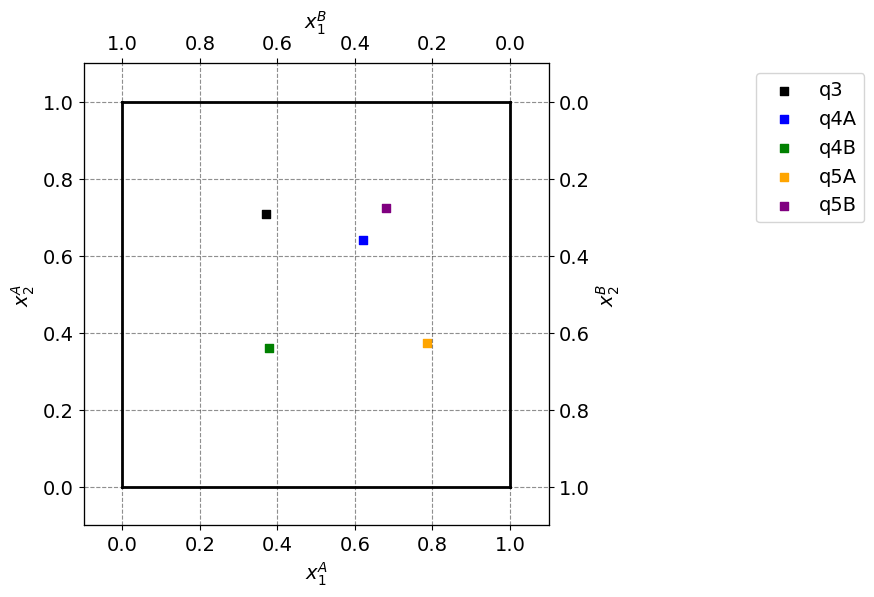

In [189]:
#We illustrate the allocations by using the edgeworth box from question 1:

#Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

#Allocations: 
ax_A.scatter(x1A_optimal_q3,x2A_optimal_q3,marker='s',color='black',label='q3')
ax_A.scatter(x1A_optimal_q4a,x2A_optimal_q4a,marker='s',color='blue',label='q4A')
ax_A.scatter(x1A_optimal_q4b,x2A_optimal_q4b,marker='s',color='green',label='q4B')
ax_A.scatter(best_x1A,best_x2A,marker='s',color='orange',label='q5A')
ax_A.scatter(x1A_optimal_q5b,x2A_optimal_q5b,marker='s',color='purple',label='q5B')


#Limits 
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.7,1.0));


In [190]:
#From the edgeworth plot we see the allocations we have found in the questions up on till now, and we conclude based on q6A that in this part of the assignment, meaning q6, where we look for aggregated utility and therefore the allocation in q6A is the best one in this case. 

## 11. <a id='toc11_'></a>[Question 7: Draw a set W with 50 elements](#toc11_)

In the seventh question we are asked to consider a random set W.

In [220]:
np.random.seed(42) #We are choosing a random set - 42. 
W = np.random.uniform(low=0.0, high=1.0, size=50) #We create the W set with 50 elements and with U(0,1) for both w_1^A and w_2^A

print("A set of 50 elements:", W)




A set of 50 elements: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446]


## 12. <a id='toc12_'></a>[Question 8: Find the market equilibrium allocation for each w^A belonging to C and plot them in the Edgeworth box](#toc12_)

In the last question we are asked to find the market equilibrium allocation for each $\omega^A \in C$ and to plot them in the Edgeworth box. 

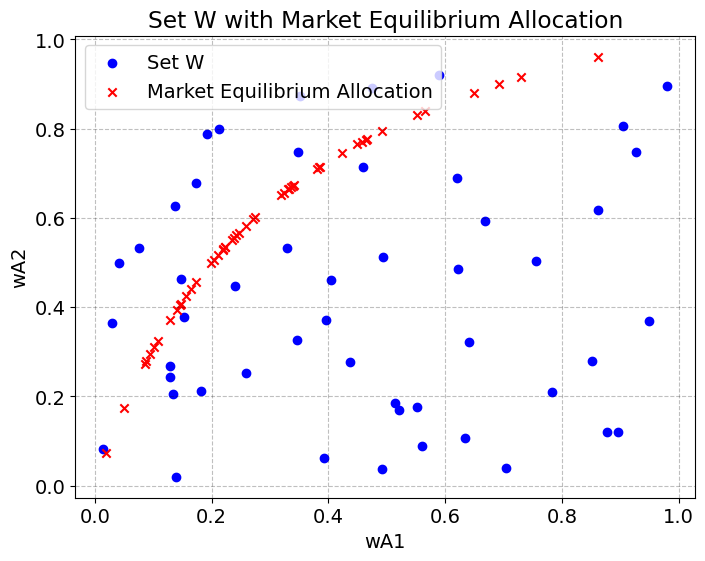

In [226]:
import numpy as np
import matplotlib.pyplot as plt

#First we want to just illustrate the endowment from the random drawn set: 
#Here we get 50 random values for wA1 and wA2
wA1 = np.random.uniform(0, 1, size=50)
wA2 = np.random.uniform(0, 1, size=50)

#We define the function to calculate market equilibrium allocation for a given pair of wA1 and wA2
def market_equilibrium_allocation(wA1, wA2):
    #We define the parameter values:
    alpha = 1/3  # Parameter alpha
    beta = 2/3   # Parameter beta

    #We define the demand functions for consumer A and B with wA1 and wA2 that we have defined in the beginning:
    def demand_A(p1, p2):
        x1A = alpha*((p1*wA1+p2*wA2)/p1)
        x2A = (1-alpha)*((p1*wA1+p2*wA2)/p2)
        return x1A, x2A
    
    def demand_B(p1, p2):
        x1B = beta*((p1*(1-wA1)+p2*(1-wA2))/p1)
        x2B = (1-beta)*((p1*(1-wA1)+p2*(1-wA2))/p2)
        return x1B, x2B

    #We define the error functions for market clearing condition with the wA1 and wA2 that we have defined in the beginning:
    def error1(p1, p2):
        x1A, x2A = demand_A(p1, p2)
        x1B, x2B = demand_B(p1, p2)
        return x1A + x1B - (wA1 + (1 - wA1))  # Market clearing for good 1

    def error2(p1, p2):
        x1A, x2A = demand_A(p1, p2)
        x1B, x2B = demand_B(p1, p2)
        return x2A + x2B - (wA2 + (1 - wA2))  # Market clearing for good 2

    #We find the market equilibrium prices using scipy's root-finding function.
    #By using the root-finding function it helps us to find the market equilibrium prices by solving the equations representing the excess demand for each good.
    from scipy.optimize import root
    result = root(lambda x: [error1(*x), error2(*x)], x0=[1, 1]) #We define a lambda function that incorporates the excess demand equations for both goods (error1 and error2). Furthermore we add our initial guess (x0=[1, 1]) which is need for the root-finding to start its search for p1 and p2.
    p1, p2 = result.x

    #We calculate the market equilibrium allocations based on the p1 and p2 we found right above.
    x1A, x2A = demand_A(p1, p2)
    x1B, x2B = demand_B(p1, p2)
    return p1, p2, x1A, x2A, x1B, x2B

#We calculate the market equilibrium allocation for both wA1 and wA2:
market_allocations = [market_equilibrium_allocation(w1, w2) for w1, w2 in zip(wA1, wA2)]

#We extracting allocations for plotting:
x1A_values = [allocation[2] for allocation in market_allocations] #It is [2] because it is the 2 element in the return function under where we calculate the market equilibrium allocations based on the p1 and p2.
x2A_values = [allocation[3] for allocation in market_allocations] #Same for [3] being 3 element

#We plot the W set with the market equilibrium allocations:
plt.figure(figsize=(8, 6))
plt.scatter(wA1, wA2, color='blue', marker='o', label='Set W')
plt.scatter(x1A_values, x2A_values, color='red', marker='x', label='Market Equilibrium Allocation')
plt.title('Set W with Market Equilibrium Allocation')
plt.xlabel('wA1')
plt.ylabel('wA2')
plt.legend()
plt.grid(True)
plt.show()